<a href="https://colab.research.google.com/github/dltjdrb/R-E/blob/main/deep_learning_from_scratch_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

In [4]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [5]:
def step_function(x): # 넘파이 배열도 가능하게 바꿈
    y = x > 0
    return y.astype(np.int)

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

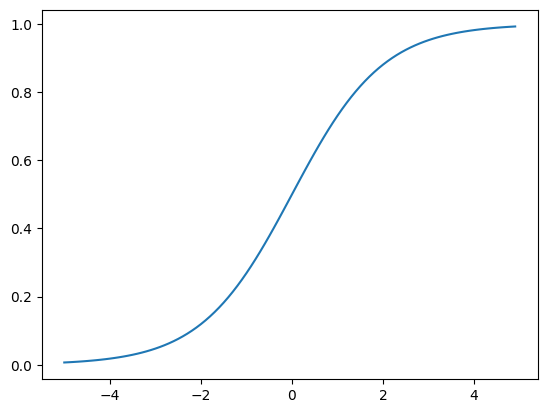

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim = (-0.1, 1.1)
plt.show()

In [7]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

In [9]:
y = y.astype(np.int64)
y

array([0, 1, 1])

계단 함수의 그래프

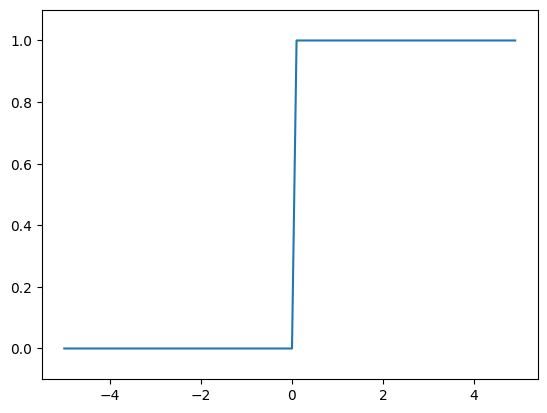

In [13]:
import matplotlib.pyplot as plt
def step_function(x):
    return np.array(x > 0, dtype = np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

비선형 함수: 층을 쌓을 수 있음. 또한 매끄럽게 변한다.

ReLU: x와 0 중에 더 큰 값을 출력

In [15]:
def relu(x):
    return np.maximum(0,x)

신경망에서의 행렬의 곱

In [16]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


In [19]:
def identity_function(x):
    return x # 항등함수

In [20]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [23]:
def softmax(a):

    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y # <- 오버플로 가능

Softmax 함수: 오버플로 문제 해결

In [24]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

소프트맥스 함수는 대소 관계를 변하지 않게 하고, 확률적인 결론을 낼 수 있음(합이 1)